<a href="https://colab.research.google.com/github/AnannyaSagar/Netflix-and-TV-Shows-Clustering-and-recommendation-system/blob/main/Netflix_Movies_and_TV_Shows(Individual_notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
#color palette for our plots
import matplotlib.cm
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [ '#221f1f', '#b20710', '#e50914','#f5f5f1'])
matplotlib.cm.register_cmap("mycolormap", cmap)
cpal = sns.color_palette("mycolormap", n_colors=10, desat=0.9)
cmap

In [4]:
#read the data
#dfff=pd.read_csv("/content/drive/MyDrive/Almabetter Notes/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
dfff = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
#dfff=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [5]:
#head of data
dfff.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#tail of data
dfff.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
#basic info
dfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#basic stat description
dfff.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [9]:
df = dfff.copy()

In [10]:
#basic stat description
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [11]:
# check duplicates
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [12]:
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

* 2389 nulls in 'director'
* 718 in 'cast'
* 507 in 'country'
* 10 in 'date_added'
* 7 in rating

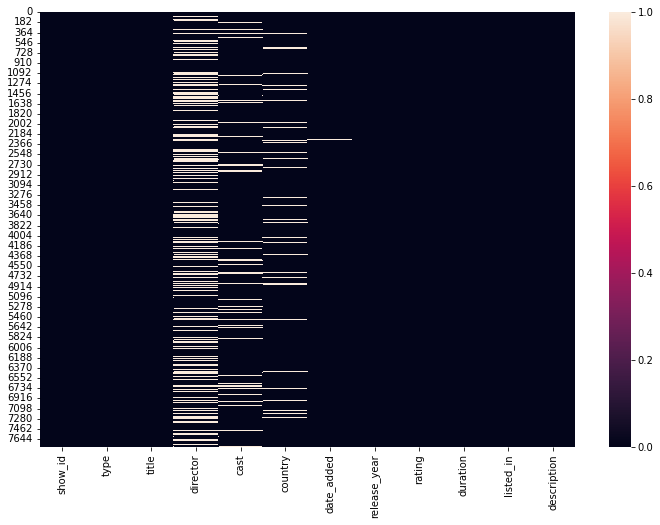

In [13]:
#null value heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [14]:
#Looking for unique values
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [15]:
#making a copy of the original dataset
dff = df.copy()

# Univariate Analysis before Clustering

# 1. Type Column

In [16]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [18]:
import matplotlib.cm
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [ '#221f1f', '#b20710', '#e50914','#f5f5f1'])
matplotlib.cm.register_cmap("mycolormap", cmap)
cpal = sns.color_palette("mycolormap", n_colors=10, desat=0.9)
cmap

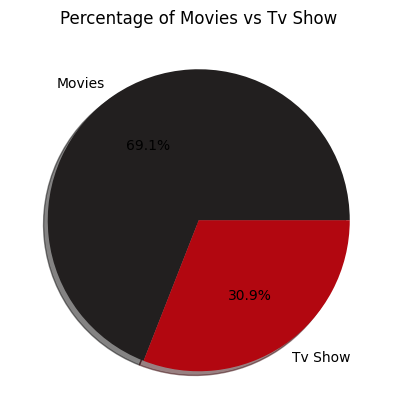

In [19]:
plt.figure(figsize=(7,5), dpi=100)
proportion = df['type'].value_counts()
labels = ['Movies', 'Tv Show']
plt.title('Percentage of Movies vs Tv Show')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%',colors = ['#221f1f', '#b20710'])
plt.show()

The percentage of movies is approximately 70% and tv shows is 30% approximately. So, there are more movies than tv shows in the dataset.

# 2. Ttile Column

In [20]:
#number unique points
df.title.nunique()

7787

In [21]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


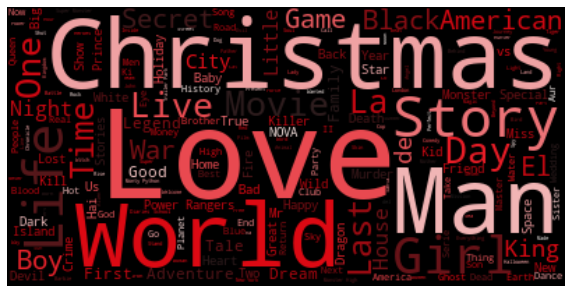

In [22]:
#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black",colormap=cmap).generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words that occurred most of the time in the title are LOVE, MAN, WORLD, CHRISTMAS. 

**Hypothesis :** We can infer from the above words that there are more movies/tv shows of the romatic genre and also christmas movies/tv shows.

# 3. Director

In [23]:
#number of unique dir
df.director.nunique()

4049

In [24]:

#looking at director series
df.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

## Top 20 Directors with most number of Movies/Shows on Netflix

In [25]:
#convert the actor to get final df for actor
def convert_to_list(df):
  dir_count = {}
  dir_count_final = []
  dir_list = list(df['director'])
  for each in range(len(dir_list)):
    dir_count_final.extend(str(dir_list[each]).split(","))
  for each in dir_count_final:
    if each not in dir_count:
      dir_count[each] = dir_count_final.count(each)
  return dir_count
  


In [26]:
dir_df = convert_to_list(df)

In [27]:
#dataframe for cast v/s count
director_df = pd.DataFrame.from_dict(dir_df, orient='index', columns=['count'])

In [28]:
director_df

,count
nan,2389
Jorge Michel Grau,1
Gilbert Chan,1
Shane Acker,1
Robert Luketic,4
...,...
Rodrigo Guardiola,1
Gabriel Cruz Rivas,1
Peter Hewitt,1
Josef Fares,1


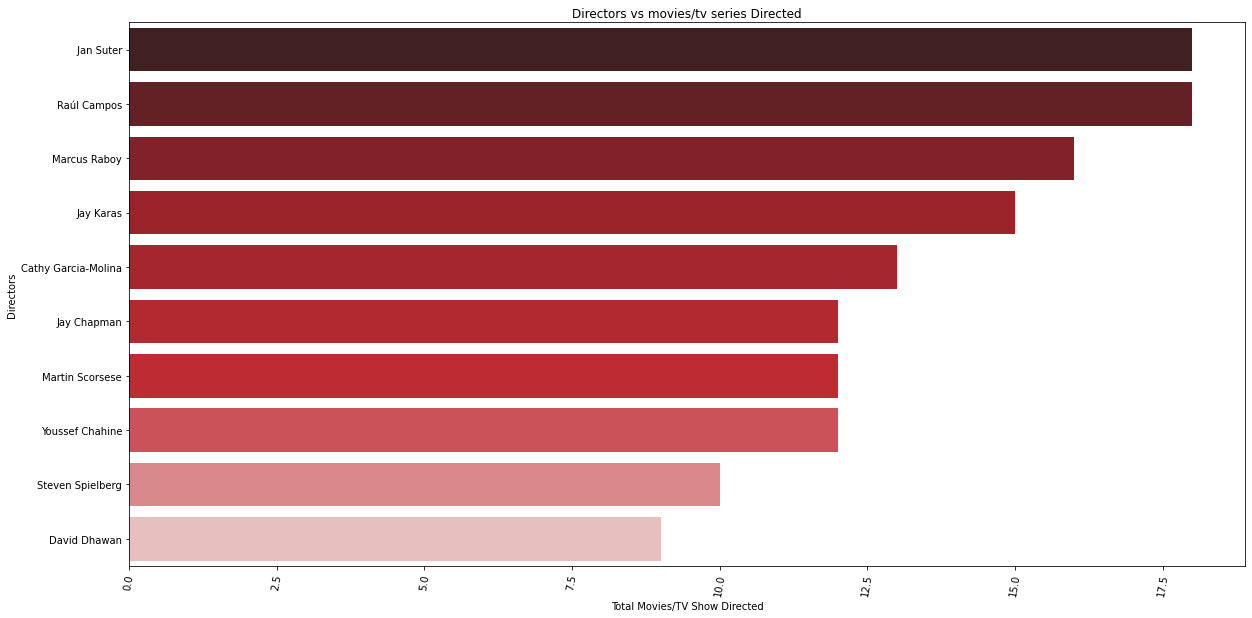

In [29]:
#plot for director
plt.rcParams["figure.figsize"] = (20, 10)
cpal = sns.color_palette("mycolormap", n_colors=10, desat=0.9)

director = director_df.sort_values('count', ascending=False).drop('nan').head(10)
sns.barplot( director['count'], director.index, palette= cpal)
plt.ylabel("Directors")
plt.xlabel("Total Movies/TV Show Directed")
plt.title("Directors vs movies/tv series Directed")
plt.xticks(rotation=80);

###The most number of content in the NETFLIX were directed by "Jan Suter", followed by "Raul Compos", "Marcus Roby".

In [30]:
#since there are many rows with nan director, we have filled it using empty string
df['director']=df['director'].fillna('')

# 4. Cast 

In [31]:
#unique number of cast
df.cast.nunique()

6831

In [32]:
#missing dealth with emprty string replacing
df_actors = df['cast'].fillna('')

In [33]:
df_actors.isnull().sum()

0

In [34]:
df_actors

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                     
Name: cast, Length: 7787, dtype: object

In [35]:
#convert the actor to get final df for actor
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(df['cast'])
  for each in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[each]).split(","))
  for each in cast_count_final:
    if each not in cast_count:
      cast_count[each] = cast_count_final.count(each)
  return cast_count

In [36]:
cast_df = convert_to_list(df)

In [37]:
#dataframe for cast v/s count
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns=['count'])

## Top Actors with highest count of Movies

In [38]:
#highest number movie for actors
casts_df.sort_values('count', ascending=False).drop('nan')

,count
Anupam Kher,38
Takahiro Sakurai,28
Shah Rukh Khan,27
Om Puri,27
Boman Irani,25
...,...
Juan Manuel Diaz,1
Ana Wills,1
Mauricio Figueroa,1
Matias Maldonado,1


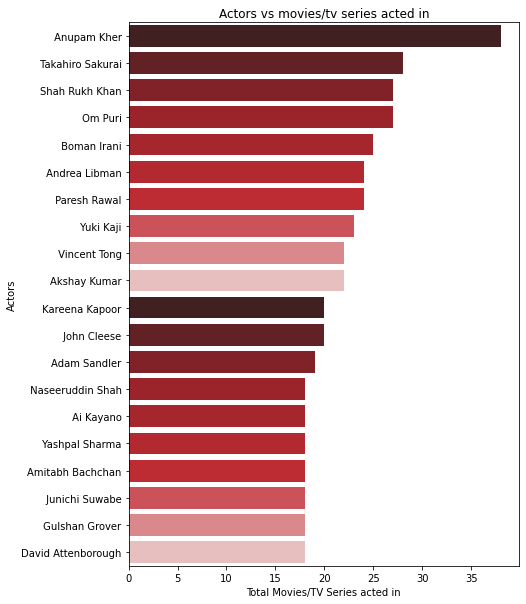

In [39]:
  # plot for top actors and count
  plt.figure(figsize=(7,10))
  cpal = sns.color_palette("mycolormap", n_colors=10, desat=0.9)
  plt.rcParams["figure.figsize"] = (20, 10)
  cast = casts_df.sort_values('count', ascending=False).drop('nan').head(20)
  sns.barplot(cast['count'],cast.index, palette = cpal)
  plt.ylabel("Actors")
  plt.xlabel("Total Movies/TV Series acted in")
  plt.title("Actors vs movies/tv series acted in");

Actors from India like Anupam Kher, Shahrukh Khan, Om Puri, Boman Irani, Paresh Rawal, Kareena Kapoor occur in the top 10 actors who acted in different movies.





##**Hypothesis :** Movies across the globe are mostly from India as there are more actors whose names come under top 20 movies count.

In [40]:
#replacing cast with also empty string
df['cast']=df['cast'].fillna('')


# 5. Country

In [41]:
#count of unique column
df.country.nunique()

681

In [42]:
# Looking for countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [43]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

## Top 20 Countries with more number of Productions

In [44]:
#Top 20 countries
top_countries=country_df.head(20)
top_countries = top_countries[top_countries['country']!='']
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3297,866,2431
1,India,990,75,915
2,United Kingdom,723,256,467
3,Canada,412,126,286
4,France,349,84,265
5,Japan,287,184,103
6,Spain,215,57,158
7,South Korea,212,157,55
8,Germany,199,42,157
9,Mexico,154,53,101


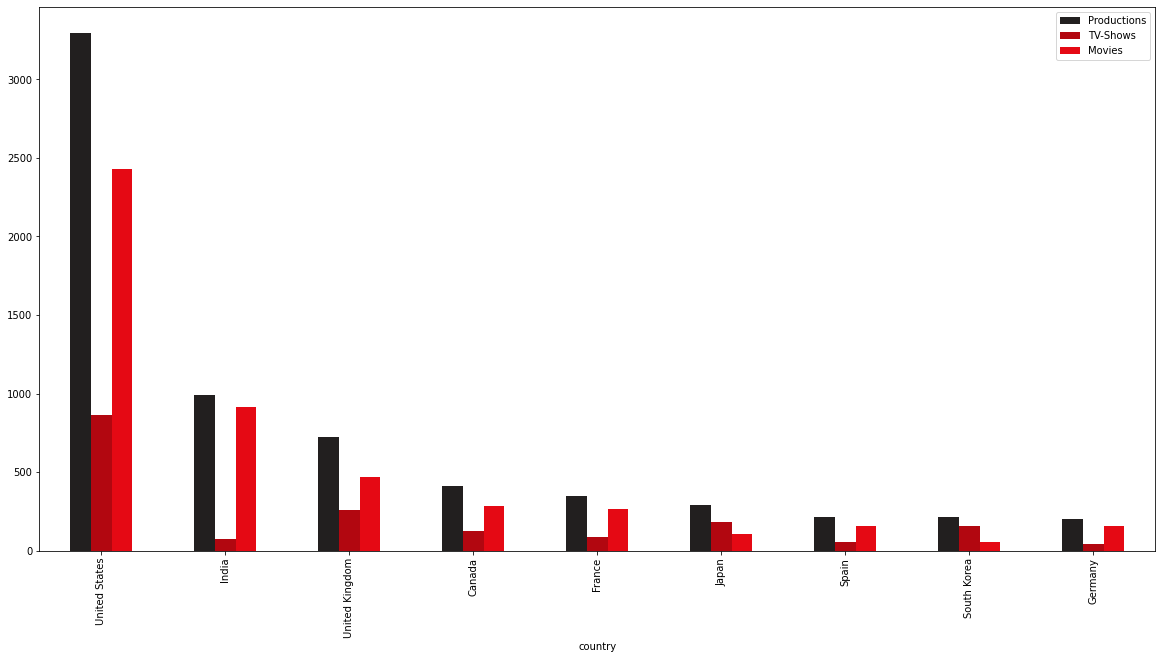

In [45]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar",color=[ '#221f1f', '#b20710', '#e50914'])

Most number of content are movies compared to TV shows.

**Hypothesis :** Netflix focuses more on movies as compared to TV shows from all content created by countries.

# 6. Date Added

In [46]:
#changed date added to datetime object 
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


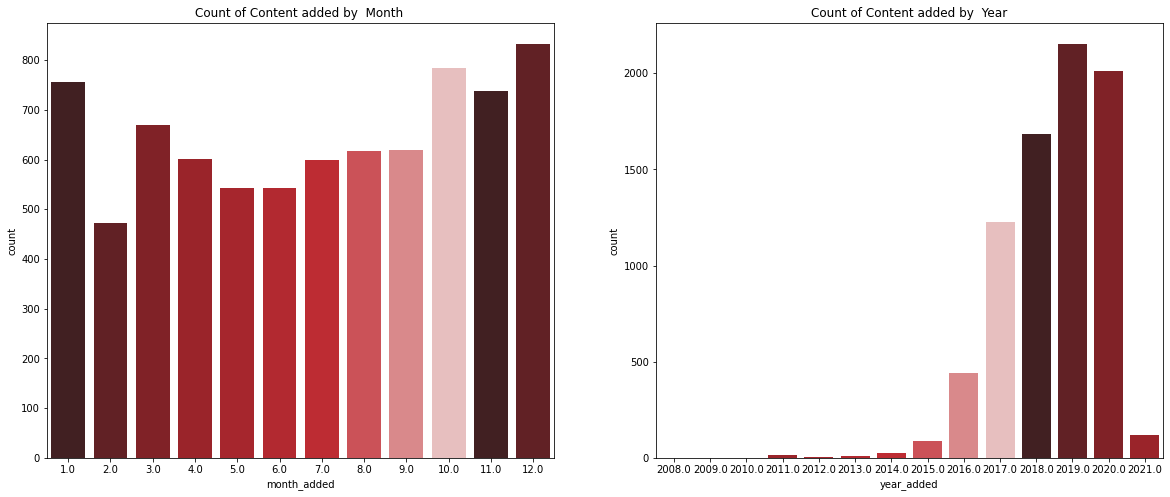

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1=sns.countplot(df['month_added'],palette=cpal,ax=axs[0]);
ax1.title.set_text('Count of Content added by  Month ')

ax2=sns.countplot(df['year_added'],palette=cpal,ax=axs[1]);
ax2.title.set_text('Count of Content added by  Year');


1) Most of the content gets added from October to January.

2) There is an increase in amount of content added and its highest in 2019.


